<a href="https://colab.research.google.com/github/LeeJaeEun0/PlayData_230116/blob/main/230115_ch06_DL_02_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

## 데이터 불러오기

In [90]:
# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# https://github.com/financedata-org/FinanceDataReader
# https://pypi.org/
!pip install yfinance -q

In [91]:
import yfinance as yf

In [92]:
history = yf.Ticker('SBUX').history(period='max') # 스타벅스의 주식코드 -> pandas df
history

Open        High         Low       Close  \
Date                                                                        
1992-06-26 00:00:00-04:00    0.263531    0.279217    0.257257    0.269806   
1992-06-29 00:00:00-04:00    0.272943    0.294904    0.266668    0.288629   
1992-06-30 00:00:00-04:00    0.294904    0.298041    0.276080    0.279217   
1992-07-01 00:00:00-04:00    0.282355    0.288629    0.272943    0.285492   
1992-07-02 00:00:00-04:00    0.288629    0.288629    0.279217    0.285492   
...                               ...         ...         ...         ...   
2023-01-09 00:00:00-05:00  106.519997  106.680000  104.430000  104.739998   
2023-01-10 00:00:00-05:00  104.360001  106.430000  104.169998  106.000000   
2023-01-11 00:00:00-05:00  105.809998  106.440002  104.860001  106.300003   
2023-01-12 00:00:00-05:00  106.290001  106.440002  105.169998  105.849998   
2023-01-13 00:00:00-05:00  105.070000  107.300003  105.070000  107.230003   

                              Volume  Dividends  Stock Splits  
Date                                                           
1992-06-26 00:00:00-04:00  224358400        0.0           0.0  
1992-06-29 00:00:00-04:00   58732800        0.0           0.0  
1992-06-30 00:00:00-04:00   34777600        0.0           0.0  
1992-07-01 00:00:00-04:00   18316800        0.0           0.0  
1992-07-02 00:00:00-04:00   13996800        0.0           0.0  
...                              ...        ...           ...  
2023-01-09 00:00:00-05:00   10124800        0.0           0.0  
2023-01-10 00:00:00-05:00    4183600        0.0           0.0  
2023-01-11 00:00:00-05:00    5634400        0.0           0.0  
2023-01-12 00:00:00-05:00    4882000        0.0           0.0  
2023-01-13 00:00:00-05:00    5527500        0.0           0.0  

[7695 rows x 7 columns]

In [93]:
# Date -> 인덱스에서 뽑아내기
history.reset_index(inplace=True)
history.head()
# data open - 시작 high - 고 low - 저 closw - 종

Date      Open      High       Low     Close  \
0 1992-06-26 00:00:00-04:00  0.263531  0.279217  0.257257  0.269806   
1 1992-06-29 00:00:00-04:00  0.272943  0.294904  0.266668  0.288629   
2 1992-06-30 00:00:00-04:00  0.294904  0.298041  0.276080  0.279217   
3 1992-07-01 00:00:00-04:00  0.282355  0.288629  0.272943  0.285492   
4 1992-07-02 00:00:00-04:00  0.288629  0.288629  0.279217  0.285492   

      Volume  Dividends  Stock Splits  
0  224358400        0.0           0.0  
1   58732800        0.0           0.0  
2   34777600        0.0           0.0  
3   18316800        0.0           0.0  
4   13996800        0.0           0.0

In [94]:
# history = history[['Date', 'Open', 'High', 'Low', 'Close']] # 학습에 사용할 데이터만 남겨주기
history.drop(['Volume', 'Dividends', 'Stock Splits'],axis=1, inplace=True )

In [95]:
history.head()

Date      Open      High       Low     Close
0 1992-06-26 00:00:00-04:00  0.263531  0.279217  0.257257  0.269806
1 1992-06-29 00:00:00-04:00  0.272943  0.294904  0.266668  0.288629
2 1992-06-30 00:00:00-04:00  0.294904  0.298041  0.276080  0.279217
3 1992-07-01 00:00:00-04:00  0.282355  0.288629  0.272943  0.285492
4 1992-07-02 00:00:00-04:00  0.288629  0.288629  0.279217  0.285492

In [96]:
import pandas as pd

In [97]:
# 시간 없애고 시간 남기기
# dt.data -> str(문자열)
# 시간을 없애기 위해서 -> datatime -> dt.data(시간X)
history.Date = pd.to_datetime(history.Date.dt.date)
history.head()

Date      Open      High       Low     Close
0 1992-06-26  0.263531  0.279217  0.257257  0.269806
1 1992-06-29  0.272943  0.294904  0.266668  0.288629
2 1992-06-30  0.294904  0.298041  0.276080  0.279217
3 1992-07-01  0.282355  0.288629  0.272943  0.285492
4 1992-07-02  0.288629  0.288629  0.279217  0.285492

In [98]:
history.describe(include='all')

<ipython-input-98-37dc76420ef0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  history.describe(include='all')


Date         Open         High          Low  \
count                  7695  7695.000000  7695.000000  7695.000000   
unique                 7695          NaN          NaN          NaN   
top     1992-06-26 00:00:00          NaN          NaN          NaN   
freq                      1          NaN          NaN          NaN   
first   1992-06-26 00:00:00          NaN          NaN          NaN   
last    2023-01-13 00:00:00          NaN          NaN          NaN   
mean                    NaN    24.451344    24.699755    24.200004   
std                     NaN    29.829535    30.104477    29.549662   
min                     NaN     0.263531     0.279217     0.257257   
25%                     NaN     3.307943     3.418500     3.220726   
50%                     NaN    10.240064    10.346481    10.101523   
75%                     NaN    44.568509    44.900574    44.047441   
max                     NaN   122.150259   122.382775   120.919839   

              Close  
count   7695.000000  
unique          NaN  
top             NaN  
freq            NaN  
first           NaN  
last            NaN  
mean      24.457411  
std       29.834780  
min        0.269806  
25%        3.328649  
50%       10.238127  
75%       44.505165  
max      122.130882

In [99]:
# between(A,B) A와 B사이의 날짜만 표시 (포함)
df = history[history.Date.between('2019-01-01', '2022-12-31')]
df

Date       Open        High        Low      Close
6678 2019-01-02  58.848647   59.486300  58.414304  59.440090
6679 2019-01-03  58.645340   58.885616  56.741632  56.861767
6680 2019-01-04  57.665763   59.375403  57.370041  58.746994
6681 2019-01-07  58.543684   59.366160  57.979967  58.746994
6682 2019-01-08  59.088923   59.412371  58.266447  58.793201
...         ...        ...         ...        ...        ...
7681 2022-12-23  97.589996   98.300003  96.879997  98.269997
7682 2022-12-27  98.570000   99.459999  98.209999  99.199997
7683 2022-12-28  99.410004   99.910004  98.389999  98.599998
7684 2022-12-29  99.000000  100.650002  98.669998  99.769997
7685 2022-12-30  99.190002   99.250000  98.239998  99.199997

[1008 rows x 5 columns]

In [100]:
# between(A,B) A와 B사이의 날짜만 표시 (포함)
df = history[history.Date.between('2019-01-01', '2022-12-31')].reset_index(drop=True)
df

Date       Open        High        Low      Close
0    2019-01-02  58.848647   59.486300  58.414304  59.440090
1    2019-01-03  58.645340   58.885616  56.741632  56.861767
2    2019-01-04  57.665763   59.375403  57.370041  58.746994
3    2019-01-07  58.543684   59.366160  57.979967  58.746994
4    2019-01-08  59.088923   59.412371  58.266447  58.793201
...         ...        ...         ...        ...        ...
1003 2022-12-23  97.589996   98.300003  96.879997  98.269997
1004 2022-12-27  98.570000   99.459999  98.209999  99.199997
1005 2022-12-28  99.410004   99.910004  98.389999  98.599998
1006 2022-12-29  99.000000  100.650002  98.669998  99.769997
1007 2022-12-30  99.190002   99.250000  98.239998  99.199997

[1008 rows x 5 columns]

<ipython-input-101-15613968b33e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['Close'] = df['Close'] # 정답 : 종가


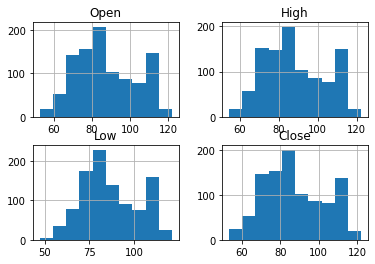

In [101]:
# 시간 순서대로 주가를 분석해서 -> 다음날의 종가(Close)를 예측
df_used = df[['Open', 'High', 'Low']] # 입력 : 개장가 / 최고가 / 최저가
df_used['Close'] = df['Close'] # 정답 : 종가
hist = df_used.hist()

## 데이터셋 만들기

In [102]:
# 학습용 데이터셋 (Starbucks)
import numpy as np
from torch.utils.data.dataset import Dataset

class Starbucks(Dataset):
    def __init__(self) -> None:
        super().__init__()
        # [입력값]
        self.data = df_used.drop('Close', axis=1).values # 값은 있는 numpy 배열
        self.data = self.data / np.max(self.data) # np.max 해당 배열에서 가장 큰값 -> 0~1 사이로 데이터를 스케일링
        # 데이터 정규화, 스케일링...
        # [정답값]
        self.label = df_used['Close'].values
        self.label = self.label / np.max(self.label) # 0~1
    
    def __len__(self): # 30일치를 묶어서 학습 -> 사용가능한 배치 개수
        return len(self.data) - 30
    
    # 배치를 조회할 때마다 가져오는 데이터
    def __getitem__(self, i):
        data = self.data[i:i+30]
        label = self.label[i+30]
        return data, label

## 모델 정의

In [103]:
import torch
import torch.nn as nn

In [104]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()

        # RNN 층 정의
        # Open, High, Low
        self.rnn = nn.RNN( # 3, 30 -> 8, 30
            input_size=3, hidden_size=8,
            num_layers=5, # RNN층을 몇 개 쌓을까? (3~5?)
            # 너무 많으면 -> 기울기 소실 -> 특징을 업데이트 X
            # 너무 적으면 -> 기울기 폭발 -> 학습 X
            batch_first=True
        )

        # FC / MLP => 분류 예측
        # 주가(종가)를 예측하는 MLP층 정의
        # view, flattern
        self.fc1 = nn.Linear(in_features=8*30, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    
    # 순전파
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0) # RNN층의 출력
        #  x -> 층을 거쳐 나온 결과 (출력층) . hn은 모든 RNN층의 은닉 상태 (누적 가중치)
        x = torch.reshape(x, (x.shape[0], -1))
        # x = x.view(-1, 8 * 30)

        # FC(fully-connected, 전결합층), MLP(multi-layer perceptron, 다층 퍼셉트론)층
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        # 출력층
        x = torch.flatten(x) # 예측한 종가를 1차원 표현
        return x

In [105]:
from tqdm.notebook import tqdm # 진척 상황 시각화 라이브러리
from torch.optim.adam import Adam # 가장 무난하게 쓰이는 최적함수
from torch.utils.data.dataloader import DataLoader # 데이터셋 -> 데이터로더 -> 배치사이즈별로 학습

In [106]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

model = RNN().to(device)
dataset = Starbucks()

In [107]:
loader = DataLoader(dataset, batch_size=32)

In [108]:
optim = Adam(params=model.parameters(), lr=0.0001)

In [109]:
for epoch in range(200):
    iterator = tqdm(loader)
    for data, label in iterator:
        optim.zero_grad()
        # 초기 은닉 상태
        # RNN 레이어 수, 배치 크기, 은닉층의 면(데이터 들어오는 창구)
        h0 = torch.zeros(5, data.shape[0], 8).to(device)
        # 모델의 예측값
        preds = model(data.type(torch.FloatTensor).to(device), h0)
        # 손실 계산
        loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
        loss.backward() # 역전파
        optim.step() # 최적화

        iterator.set_description(f"epoch{epoch} loss:{loss.item()}")

torch.save(model.state_dict(), "./rnn.pth")

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [110]:
import matplotlib.pyplot as plt

loader = DataLoader(dataset, batch_size=1) # 예측값을 위한 데이터 로더

preds = [] # 예측값 저장할 리스트
total_loss = 0

with torch.no_grad():
    model.load_state_dict(torch.load('rnn.pth', map_location=device))

    for data, label in loader:
        h0 = torch.zeros(5, data.shape[0], 8).to(device)

        pred = model(data.type(torch.FloatTensor).to(device), h0)
        preds.append(pred.item()) # 실제값과 예측값 사이의 비교를 위해서 예측값을 저장

        # 손실 계산
        loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
        total_loss += loss/len(loader) # 손실의 평균치

In [111]:
total_loss.item()

0.0009719568770378828

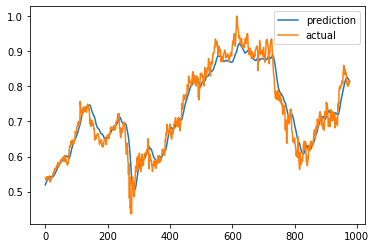

In [112]:
plt.plot(preds, label='prediction')
plt.plot(dataset.label[30:], label='actual')
plt.legend() # 예측이 일치하지 않지만 트렌드는 알 수 있음
plt.show()

In [114]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=3,
                          hidden_size=8,
                          num_layers=5,
                          batch_first=True)
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0)
        x = torch.reshape(x, (x.shape[0], -1))
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = torch.flatten(x)
        return x

def use_rnn(dataset):
    device = 'cuda' if torch.cuda.is_available() else "cpu"
    model = RNN().to(device)
    # dataset = Netflix()
    train_loader = DataLoader(dataset, batch_size=32)
    optim = Adam(params=model.parameters(), lr=0.0001)
    learn(model, train_loader, optim)
    pred_loader = DataLoader(dataset, batch_size=1)
    preds = predict(model, pred_loader)
    visualize(preds, dataset)

def learn(model, loader, optim):
    for epoch in range(200):
        iterator = tqdm(loader)
        for data, label in iterator:
            optim.zero_grad()
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            preds = model(data.type(torch.FloatTensor).to(device), h0)
            loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
            loss.backward()
            optim.step()
            iterator.set_description(f"epoch{epoch} loss:{loss.item()}")
    torch.save(model.state_dict(), "./rnn.pth")

def predict(model, loader):
    preds = [] # 예측값 저장할 리스트
    total_loss = 0
    with torch.no_grad(): 
        model.load_state_dict(torch.load('rnn.pth', map_location=device))
        for data, label in loader:
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            pred = model(data.type(torch.FloatTensor).to(device), h0)
            preds.append(pred.item())
            loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
            total_loss += loss/len(loader)
    print(f"total_loss : {total_loss.item()}")
    return preds

def visualize(preds, dataset):
    plt.plot(preds, label="prediction")
    plt.plot(dataset.label[30:], label="actual")
    plt.legend()
    plt.show()

In [115]:
# Dataset 학습용 데이터셋 (Netflix)
import numpy as np
from torch.utils.data.dataset import Dataset
import yfinance as yf
import pandas as pd

class Stock(Dataset):
    def __init__(self, ticker, start_date, end_date):
        df = yf.Ticker(ticker).history(period='max').reset_index()
        df.Date = pd.to_datetime(df.Date.dt.date) # 날짜만 끊어줌
        # yyyy-MM-dd
        df2 = df[df['Date'].between(start_date, end_date)].reset_index(drop=True)

        # 데이터 정규화
        self.data = df2[['Open', 'High', 'Low']].values
        self.data = self.data / np.max(self.data) # np.max 배열에서 가장 큰 값

        self.label = df2['Close'].values
        self.label = self.label / np.max(self.label)
    
    # 사용가능한 배치 개수를 반환하는 __len__()
    def __len__(self):
        return len(self.data) - 30 # 사용가능한 배치 계수
        # 30일치가 묶여서 batch 

    # 30일치 데이터를 읽어오는 함수
    def __getitem__(self, i): # 0 ~ len-1
        data = self.data[i:i+30] # 입력데이터(시가,고가,저가,날짜)
        label = self.label[i+30] # 종가
        return data, label

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

total_loss : 0.00027042703004553914


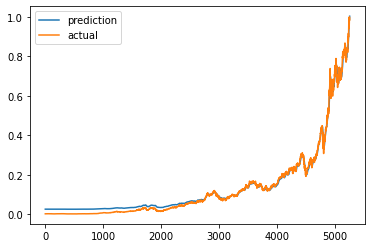

In [116]:
use_rnn(Stock('AAPL', '2001-01-01', '2021-12-31'))